<a href="https://colab.research.google.com/github/NizarMaarouf/Amazon/blob/main/Nizar_pandas_pipe_to_improve_code_readability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

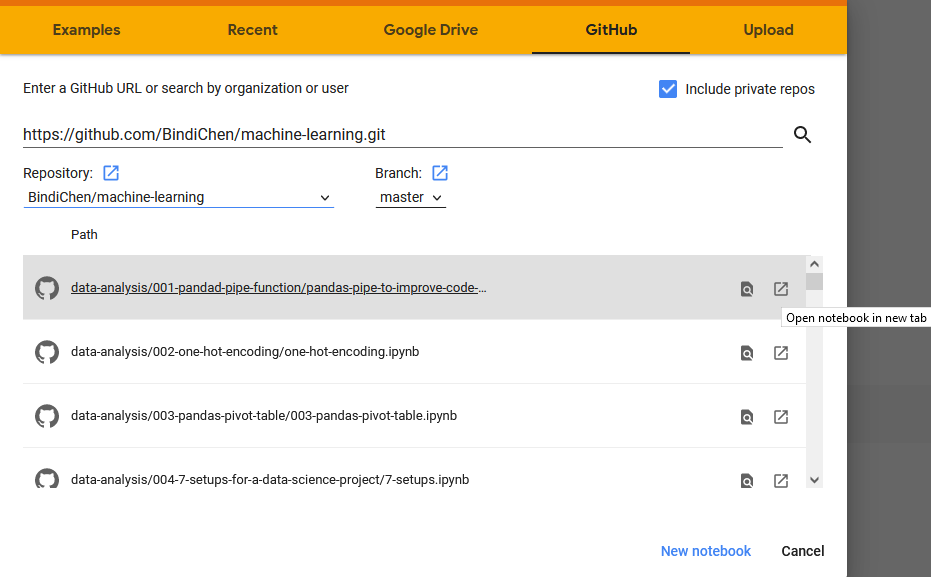

<div dir=rtl>
טיפ קטן כיצד לכתוב בעברית מימין לשמאל
<div/>





```
<div dir=rtl>

<div/>
```

# Using Pandas pipe function to improve code readability

This is a notebook for the medium article [Using Pandas pipe function to improve code readability](https://medium.com/@bindiatwork/using-pandas-pipe-function-to-improve-code-readability-96d66abfaf8)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

# Pipe introduction
In Data Processing, it is often necessary to write a function to perform operations (such as statistical calculations, splitting, or substituting value) on a certain row or column to obtain new data.

Instead of writing


```
# f(), g(), and h() are user-defined function
# df is a Pandas DataFramef(g(h(df), arg1=a), arg2=b, arg3=c)

```

We can write

```
(df.pipe(h)
   .pipe(g, arg1=a)
   .pipe(f, arg2=b, arg3=c)
)

```
Pandas introduced **pipe()** starting from version 0.16.2. 

***pipe() enables user-defined methods in method chains.***

Method chaining substantially increases the readability of the code.

# Dataset preparation
For this tutorial, we will be working on the Titanic Dataset from Kaggle.
This is a very famous dataset and very often is a student’s first step in data science. Let’s import some libraries and load data to get started.

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titanic.csv to titanic.csv
User uploaded file "titanic.csv" with length 61194 bytes


We will create a function `load_data()` to load `train.csv` file into pandas DataFrame.


In [5]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def load_data():
    return pd.read_csv('titanic.csv')

df = load_data()
df.head(15)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0             1         0       3  ...   7.2500   NaN         S
1             2         1       1  ...  71.2833   C85         C
2             3         1       3  ...   7.9250   NaN         S
3             4         1       1  ...  53.1000  C123         S
4             5         0       3  ...   8.0500   NaN         S
5             6         0       3  ...   8.4583   NaN         Q
6             7         0       1  ...  51.8625   E46         S
7             8         0       3  ...  21.0750   NaN         S
8             9         1       3  ...  11.1333   NaN         S
9            10         1       2  ...  30.0708   NaN         C
10           11         1       3  ...  16.7000    G6         S
11           12         1       1  ...  26.5500  C103         S
12           13         0       3  ...   8.0500   NaN         S
13           14         0       3  ...  31.2750   NaN         S
14           15         0       3  ...   7.8542   NaN         S

[15 rows x 12 columns]

## Missing values
Let’s start by checking out missing values.
<br>We can use seaborn to create a simple **heatmap to see where are missing values**

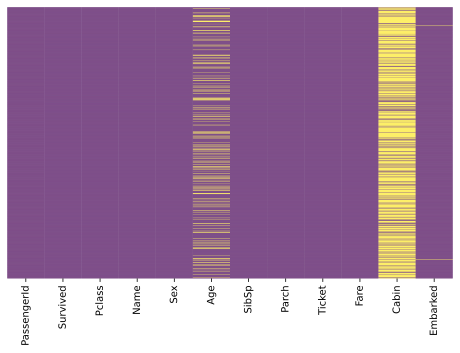

In [6]:
plt.subplots(figsize=(8,5))
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

<div dir=rtl>
ל-Age, Cabin ו- Embarked יש ערכים חסרים.<br> סביר להניח ששיעור החסרים של Age קטן מספיק להחלפה סבירה עם צורה כלשהי של שערוך.<br> כשמסתכלים על העמודה Cabin,  נראה שיש הרבה ערכים חסרים.<br> שיעור הנעדרים של Embarked קטן מאוד.
</div>

<div dir=rtl>
<strong>משימות</strong><br />
יש לבצע את המשימות הבאות:<br />
<pre class="tab">    1. לפצל את השם לשם פרטי ושם משפחה<br /></pre>
<pre class="tab">    2. עבור מין, להחליף את ערך הזכר ב-M ונקבה ב-F<br /></pre>
<pre class="tab">    3. להחליף את הגילאים החסרים בצורה כלשהי של שיערוך<br /></pre>
<pre class="tab"><div>    4. המרת גילאים לקבוצות של טווחי גילאים: </div>
<div>&nbsp;&nbsp;&nbsp; נוער בין 12 ל18</div>
<div>&nbsp;&nbsp;&nbsp; מבוגרים בין 18 ל60</div>
<div>&nbsp;&nbsp;&nbsp; גיל העמידה גדול מ60</div>
</pre>
<div>&nbsp;&nbsp;&nbsp;</div>
נשתמש ב-<strong>pipe </strong>כדי לבצע את המשימות צעד אחר צעד,
</div>

##**1. Split Name into first name and second name**

Let’s create a function `split_name()`, which takes in a **DataFrame** as input and returns a **DataFrame**.

<div dir=rtl>ניזכר כיצד פונקציית <strong>SPLIT </strong> עובדת </div>

In [12]:
def split_name(x_df):
    def split_name_series(string):
        firstName, secondName=string.split(', ')
        return pd.Series(
            (firstName, secondName),
            index='firstName secondName'.split()
        )
    # Select the Name column and apply a function
    res=x_df['Name'].apply(split_name_series)
    x_df[res.columns]=res
    return x_df


In [33]:
res=(
    load_data()
    .pipe(split_name)
)
res.head(10)

PassengerId  Survived  ...  firstName                                  secondName
0            1         0  ...     Braund                             Mr. Owen Harris
1            2         1  ...    Cumings  Mrs. John Bradley (Florence Briggs Thayer)
2            3         1  ...  Heikkinen                                 Miss. Laina
3            4         1  ...   Futrelle          Mrs. Jacques Heath (Lily May Peel)
4            5         0  ...      Allen                           Mr. William Henry
5            6         0  ...      Moran                                   Mr. James
6            7         0  ...   McCarthy                               Mr. Timothy J
7            8         0  ...    Palsson                       Master. Gosta Leonard
8            9         1  ...    Johnson    Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10         1  ...     Nasser                 Mrs. Nicholas (Adele Achem)

[10 rows x 14 columns]

##**2. For Sex, substitute value male with M and female with F**
Create a function substitute_sex(), which takes in a DataFrame as input and returns a DataFrame.

In [19]:
def substitute_sex(x_df):
    mapping={'male':'M','female':'F'}
    x_df['Sex']=df['Sex'].map(mapping)
    return x_df

x_df['Sex'] select the Sex column and then the Pandas map() used for substituting each value in a Series with another value.

In [34]:
res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
)
res.head(10)

PassengerId  Survived  ...  firstName                                  secondName
0            1         0  ...     Braund                             Mr. Owen Harris
1            2         1  ...    Cumings  Mrs. John Bradley (Florence Briggs Thayer)
2            3         1  ...  Heikkinen                                 Miss. Laina
3            4         1  ...   Futrelle          Mrs. Jacques Heath (Lily May Peel)
4            5         0  ...      Allen                           Mr. William Henry
5            6         0  ...      Moran                                   Mr. James
6            7         0  ...   McCarthy                               Mr. Timothy J
7            8         0  ...    Palsson                       Master. Gosta Leonard
8            9         1  ...    Johnson    Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10         1  ...     Nasser                 Mrs. Nicholas (Adele Achem)

[10 rows x 14 columns]

##**3. Replace the missing Age with some form of imputation**
Replace the missing Age with some form of imputation. One way to do this is by filling in the mean age of all the passengers. However, we can be smarter about this and check the average age by passenger class. For example:

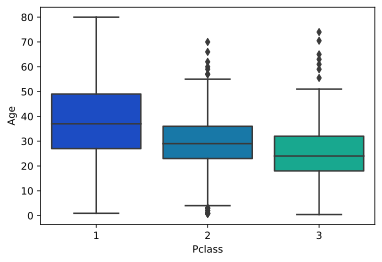

In [21]:
sns.boxplot(x='Pclass',
            y='Age',
            data=df,
            palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We’ll use these average age values to impute based on Pclass for Age.

In [22]:
pclass_age_map = {
  1: 37,
  2: 29,
  3: 24,
}
def replace_age_na(x_df, fill_map):
    cond=x_df['Age'].isna()
    res=x_df.loc[cond,'Pclass'].map(fill_map)
    x_df.loc[cond,'Age']=res
    return x_df

x_df['Age'].isna() selects the Age column and detects the missing values. Then, x_df.loc[cond, 'Pclass'] is used to access Pclass values conditionally and call Pandas map() for substituting each value with another value. Finally, x_df.loc[cond, 'Age']=res conditionally replace all missing Age values with res.

In [35]:
res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
    .pipe(replace_age_na, pclass_age_map)
)
res.head(10)

PassengerId  Survived  ...  firstName                                  secondName
0            1         0  ...     Braund                             Mr. Owen Harris
1            2         1  ...    Cumings  Mrs. John Bradley (Florence Briggs Thayer)
2            3         1  ...  Heikkinen                                 Miss. Laina
3            4         1  ...   Futrelle          Mrs. Jacques Heath (Lily May Peel)
4            5         0  ...      Allen                           Mr. William Henry
5            6         0  ...      Moran                                   Mr. James
6            7         0  ...   McCarthy                               Mr. Timothy J
7            8         0  ...    Palsson                       Master. Gosta Leonard
8            9         1  ...    Johnson    Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10         1  ...     Nasser                 Mrs. Nicholas (Adele Achem)

[10 rows x 14 columns]

All missing ages should be replaced based on Pclass for Age. Let’s check this by running the heatmap on res.

In [24]:
sns.heatmap(res.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

##**4. Convert ages to groups of age ranges: ≤12, Teen (≤18), Adult (≤60), and Older (>60)**
Create a function create_age_group(), which takes a DataFrame as input and returns a DataFrame.

In [38]:
def create_age_group(x_df):
    bins=[0, 13, 19, 61, sys.maxsize]
    labels=['Children', 'Teen', 'Adult', 'Older']
    ageGroup=pd.cut(x_df['Age'], bins=bins, labels=labels)
    x_df['ageGroup']=ageGroup
    return x_df

pd.cut() is used to convert ages to groups of age ranges.

In [40]:
res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
    .pipe(replace_age_na, pclass_age_map)
    .pipe(create_age_group)
)
res.head(15)

PassengerId  Survived  ...                                  secondName  ageGroup
0             1         0  ...                             Mr. Owen Harris     Adult
1             2         1  ...  Mrs. John Bradley (Florence Briggs Thayer)     Adult
2             3         1  ...                                 Miss. Laina     Adult
3             4         1  ...          Mrs. Jacques Heath (Lily May Peel)     Adult
4             5         0  ...                           Mr. William Henry     Adult
5             6         0  ...                                   Mr. James     Adult
6             7         0  ...                               Mr. Timothy J     Adult
7             8         0  ...                       Master. Gosta Leonard  Children
8             9         1  ...    Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Adult
9            10         1  ...                 Mrs. Nicholas (Adele Achem)      Teen
10           11         1  ...                        Miss. Marguerite Rut  Children
11           12         1  ...                             Miss. Elizabeth     Adult
12           13         0  ...                           Mr. William Henry     Adult
13           14         0  ...                            Mr. Anders Johan     Adult
14           15         0  ...                 Miss. Hulda Amanda Adolfina      Teen

[15 rows x 15 columns]

The End __________________ **NIZAR MAAROUF**

### Series
<div dir=rtl>
נזכיר כיצד לייצר עמודה series בפנדה<br>
אנחנו מעבירים את הערכים לעמודה ובנוסף את השם (האינדקס) של כל תא ותא בעמודה (שמות השורות)
<div/>

In [27]:
pd.Series(
            (b1, b2),
            index='b1 b2'.split() # its like writing: index=['b1', 'b2']
)

b1    Sunday
b2    Monday
dtype: object

<div dir=rtl>
נרכז את פעולת הSPLIT ופעולת יצור העמודה לפונקציה אחת
<div/>

In [28]:
def TEST_split_name_series(string):
        b1, b2 = string.split(', ')
        return pd.Series(
            (b1, b2),
            index='b1 b2'.split()
        )


<div dir=rtl>
נאחד את הכל לתוך פונקציה כך שהיא תמיר את עמודת השמות לשתי עמודות נפרדות: עמודת שם פרטי ועמודת שם משפחה.<br>
כלומר נקבל dataframe חדש המכיל עמודה לשם הפרטי ועמודה לשם המשפחה.<br>
לצורך ההדגמה ראשית נשכפל את בסיס הנתונים בכדי להדגים את הרעיון.<br>

<div/>

In [29]:
x_df = df.copy()
#print(x_df.head())
# Select the Name column and apply a function
res=x_df['Name'].apply(TEST_split_name_series) 
print(res) #As aresult we have a new dataframe that has two new series 

            b1                                          b2
0       Braund                             Mr. Owen Harris
1      Cumings  Mrs. John Bradley (Florence Briggs Thayer)
2    Heikkinen                                 Miss. Laina
3     Futrelle          Mrs. Jacques Heath (Lily May Peel)
4        Allen                           Mr. William Henry
..         ...                                         ...
886   Montvila                                 Rev. Juozas
887     Graham                        Miss. Margaret Edith
888   Johnston              Miss. Catherine Helen "Carrie"
889       Behr                             Mr. Karl Howell
890     Dooley                                 Mr. Patrick

[891 rows x 2 columns]


In [30]:
print(res.columns) #print the dataframe coulmns names
x_df[res.columns]=res #insert two new columns to the dataframe
print(x_df.head())

Index(['b1', 'b2'], dtype='object')
   PassengerId  Survived  ...         b1                                          b2
0            1         0  ...     Braund                             Mr. Owen Harris
1            2         1  ...    Cumings  Mrs. John Bradley (Florence Briggs Thayer)
2            3         1  ...  Heikkinen                                 Miss. Laina
3            4         1  ...   Futrelle          Mrs. Jacques Heath (Lily May Peel)
4            5         0  ...      Allen                           Mr. William Henry

[5 rows x 14 columns]


<div dir=rtl>
נארוז את כל הפעולות האלה יחדיו לתוך פונקציה אחת כוללת<br>
הסיבה שאנחנו עושים זאת היא כנרצה להשתמש בפעולת פיצול השמות לתוך שתי עמודות באמצעות pipe
<div/>

<div dir=rtl>
נשתמש בפונקציה לפיצול השם הפרטי ושם המשפחה.<br>
נשים לב שאנחנו מגדירים פונקציה בתוך פונקציה. <br> 
הפונקציה החיצונית מקבלת טבלה מלאה של DATFRAME ומחלצת מתוכה עמודה בודדת של שמות.<br>
לאחר מכאן היא מפעילה את הפונקציה הפנימית על כל תא ותא בעמודה באופן סידרתי וללא לולאה (פנדה מבצעת את הלולאה באופן אוטומטי).<br>
הפונקציה הפנימית מפצלת את השם ושם המשפחה לשני
<div/>

In [31]:
def split_name(x_df):
    def split_name_series(string):
        firstName, secondName=string.split(', ')
        return pd.Series(
            (firstName, secondName),
            index='firstName secondName'.split()
        )
    # Select the Name column and apply a function
    res=x_df['Name'].apply(split_name_series) 
    x_df[res.columns]=res
    return x_df # returns a DataFrame

<div dir=rtl>
נשרשר את הפעולות. כלומר נבצע pipe בין הפונקציות.<br>
ראשית נטען את הקובץ ומיד לאחר מכאן נבצע פעול פיצול שמות
<div/>


In [32]:
#Our first pipe between data loading and name splitting
res=(
    load_data()
    .pipe(split_name)
)

res.head()

PassengerId  Survived  ...  firstName                                  secondName
0            1         0  ...     Braund                             Mr. Owen Harris
1            2         1  ...    Cumings  Mrs. John Bradley (Florence Briggs Thayer)
2            3         1  ...  Heikkinen                                 Miss. Laina
3            4         1  ...   Futrelle          Mrs. Jacques Heath (Lily May Peel)
4            5         0  ...      Allen                           Mr. William Henry

[5 rows x 14 columns]

# Pandas apply, applymap and map

[source](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff)

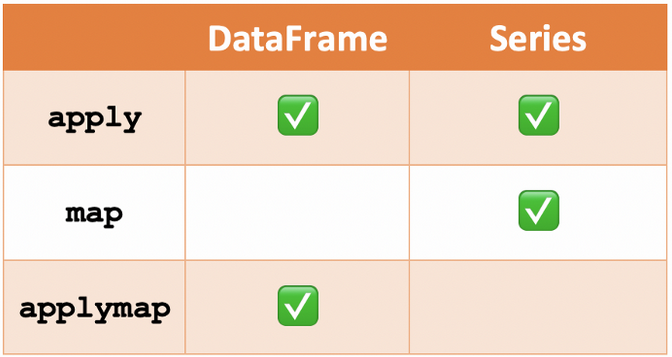

Pandas official API reference suggests that:
1. `apply()` is used to **apply a function along an axis** of the DataFrame or on **values of Series**.
2. `applymap()` is used to **apply a function** to a DataFrame **elementwise**.
3. `map()` is used to **substitute** each value in a Series with another value.


---


Before we diving into the details, let’s first create a DataFrame for demonstration.

In [ ]:
demo_df = pd.DataFrame({ 'A': [1,2,3,4], 
                   'B': [10,20,30,40],
                   'C': [20,40,60,80]
                  }, 
                  index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
demo_df

A   B   C
Row 1  1  10  20
Row 2  2  20  40
Row 3  3  30  60
Row 4  4  40  80

### How to use apply()?

The Pandas apply() is used to apply a function along an axis of the DataFrame or on values of Series.

Let’s begin with a simple example, to sum each row and save the result to a new column “D”

In [ ]:
# Let's call this "custom_sum" as "sum" is a built-in function
def custom_sum(row):
    return row.sum()

demo_df['D'] = demo_df.apply(custom_sum, axis=1) # axis=1 is to perform the function along rows
demo_df #We have now new column D that contains the sum of each row

A   B   C    D
Row 1  1  10  20   62
Row 2  2  20  40  124
Row 3  3  30  60  186
Row 4  4  40  80  248

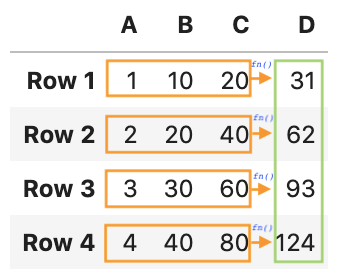

With the understanding of the sum of each row, the sum of each column is just to use axis = 0 instead

In [ ]:
demo_df.loc['Row 5'] = demo_df.apply(custom_sum, axis=0)
demo_df

A    B    C    D
Row 1   1   10   20   62
Row 2   2   20   40  124
Row 3   3   30   60  186
Row 4   4   40   80  248
Row 5  10  100  200  620

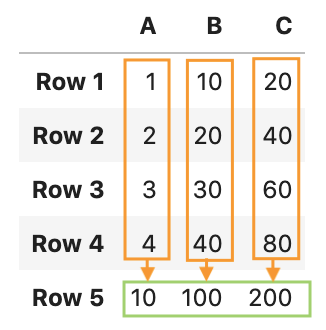

Similarly, apply() can be used on the values of Series.

In [ ]:
def multiply_by_2(val):
    return val * 2
demo_df['D'] = demo_df['C'].apply(multiply_by_2)
demo_df

A    B    C    D
Row 1   1   10   20   40
Row 2   2   20   40   80
Row 3   3   30   60  120
Row 4   4   40   80  160
Row 5  10  100  200  400

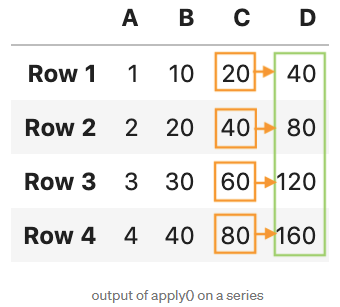

### Delete Row and Columns (**drop() method**)
Before we continue we will delete the row and column we created

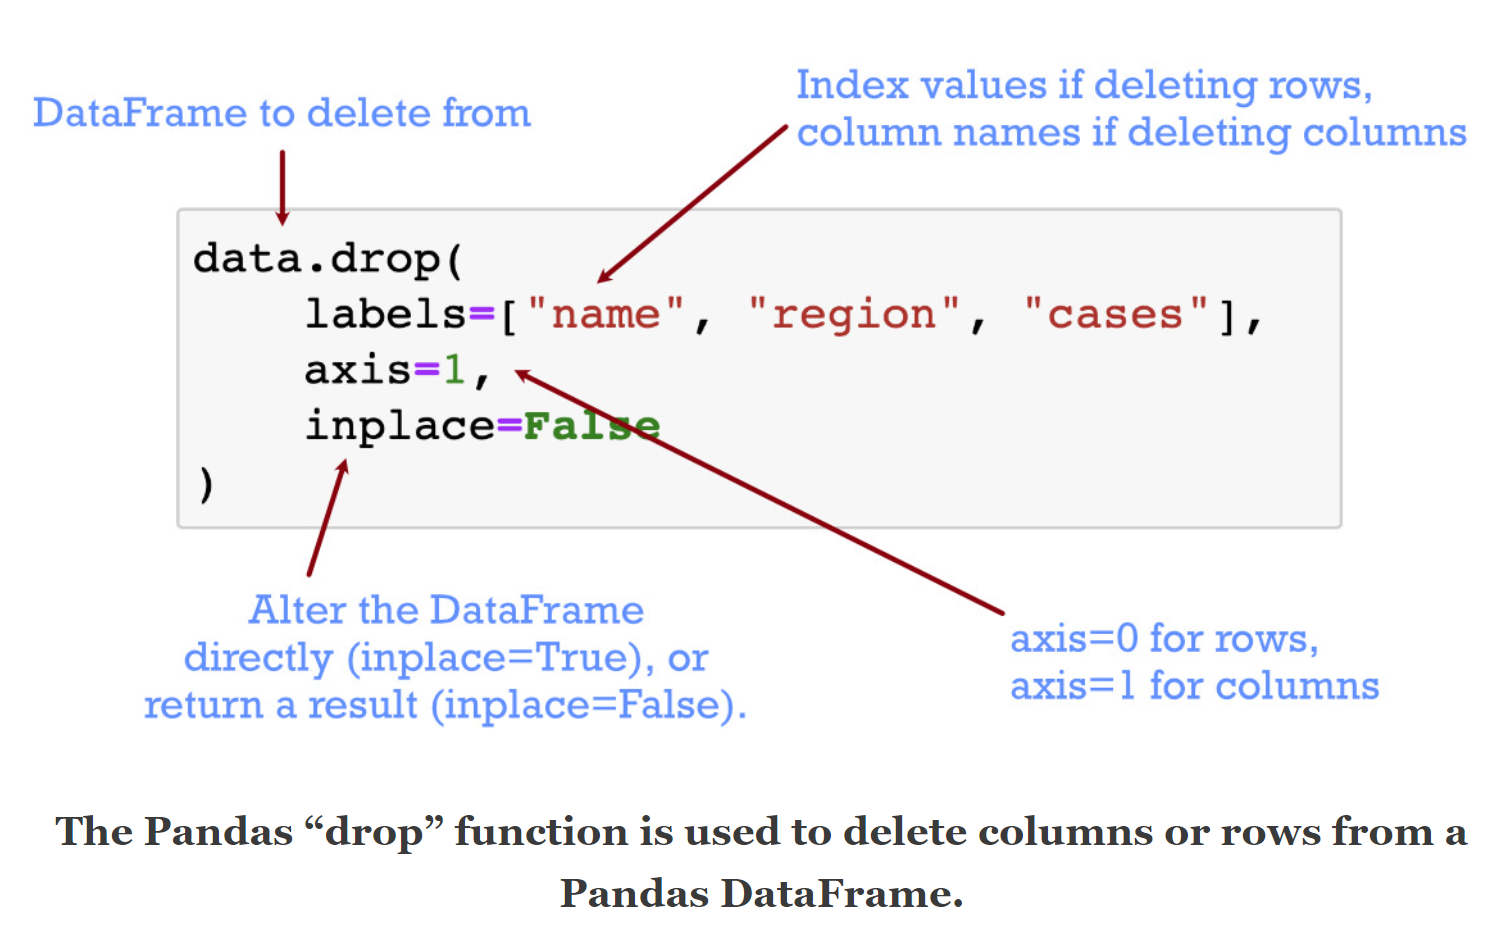


In [ ]:
print('Before drop')
print(demo_df)
demo_df.drop(labels='D',axis=1,inplace=True) # Delete column D
demo_df.drop(labels='Row 5',axis=0,inplace=True) # Delete row 5
print('\n\nAfter Drop')
print(demo_df)

Before drop
        A    B    C    D
Row 1   1   10   20   40
Row 2   2   20   40   80
Row 3   3   30   60  120
Row 4   4   40   80  160
Row 5  10  100  200  400


After Drop
       A   B   C
Row 1  1  10  20
Row 2  2  20  40
Row 3  3  30  60
Row 4  4  40  80


### How to use applymap()? ==> Create a new Dataframe and keep the original without change

`applymap() `is only available in DataFrame and used for element-wise operation across the whole DataFrame. 

It has been optimized and some cases work much faster than apply() , but it’s good to compare it with apply() before going for any heavier operation.

For example: to output a DataFrame with number squared

In [ ]:
import numpy as np
print('Before square')
print(demo_df)
aa=demo_df.applymap(np.square,)
print('After square')
print(aa) #Be notice demo_df was not changed

Before square
       A   B   C
Row 1  1  10  20
Row 2  2  20  40
Row 3  3  30  60
Row 4  4  40  80
After square
        A     B     C
Row 1   1   100   400
Row 2   4   400  1600
Row 3   9   900  3600
Row 4  16  1600  6400


### How to use map()?
`map()` is only **available in Series** and used for **substituting** each value **in a Series** with another value. To understand how the `map()` works, we first create a Series.

In [ ]:
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
s

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

It also accepts a function:

In [ ]:
s.map('I am a {}'.format)

0       I am a cat
1       I am a dog
2       I am a nan
3    I am a rabbit
dtype: object

To avoid applying the function to missing values (and keep them as **NaN**) `na_action='ignore'` can be used:

In [ ]:
s.map('I am a {}'.format, na_action='ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object